Import libraries 

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot 
%matplotlib inline

# ML Libraries
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_curve


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
 

# Tree Visualization
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot 


#Data exploration

In [ ]:
#import dataset

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Let's see the variables with higher standard deviation

df.std()

Time      47488.145955
V1            1.958696
V2            1.651309
V3            1.516255
V4            1.415869
V5            1.380247
V6            1.332271
V7            1.237094
V8            1.194353
V9            1.098632
V10           1.088850
V11           1.020713
V12           0.999201
V13           0.995274
V14           0.958596
V15           0.915316
V16           0.876253
V17           0.849337
V18           0.838176
V19           0.814041
V20           0.770925
V21           0.734524
V22           0.725702
V23           0.624460
V24           0.605647
V25           0.521278
V26           0.482227
V27           0.403632
V28           0.330083
Amount      250.120109
Class         0.041527
dtype: float64

In [ ]:
#checking for NaN values
df.isnull().values.any()

False

In [ ]:
#proportions of the the class variable, calculating the percentage
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (No Fraud: 0   Fraud: 1)')

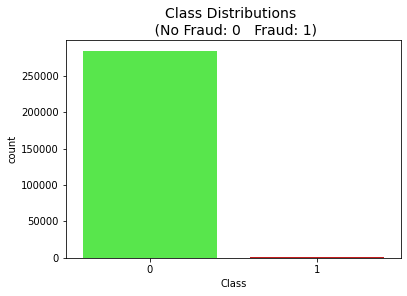

In [ ]:
#plotting how imbalanced is the target variable 'Class'
colors = ["#42FF33", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (No Fraud: 0   Fraud: 1)', fontsize=14)

In [ ]:
max(df.Amount), min(df.Amount)

(25691.16, 0.0)

In [ ]:
max(df.Time), min(df.Time)

(172792.0, 0.0)

(0.0, 172792.0)

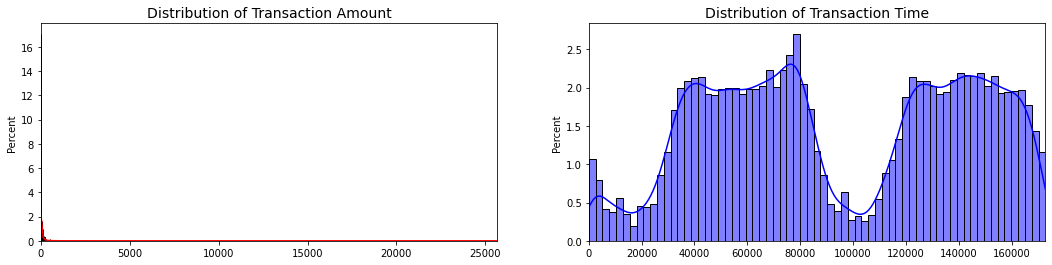

In [ ]:
#checking distribution of variables 'Time' and 'Amount' we observe that these variables are very biased
#we'll be using percent stat: normalize such that bar heights sum to 100

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', label="100% Equities", kde=True, stat="percent", linewidth=1 )
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b', label="100% Equities", kde=True, stat="percent", linewidth=1)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])




In [ ]:
#normalise the amount column
#from sklearn.preprocessing import StandardScaler
#scale= StandardScaler()
#df['NormAmount'] = scale.fit_transform(np.array(df['Amount']).reshape(-1, 1))

In [ ]:
#drop Time and Amount columns as they are too biased and not relevant for the prediction

df_ml= df.drop(['Time'], axis= 1)

In [ ]:
df_ml.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [ ]:
#sns.pairplot(df_ml[param1], hue = 'Class') 

#ML Models

##Test and train split

In [ ]:
seed = 123
test_size = 0.30 
df_train, df_test = train_test_split(df_ml, test_size=test_size,
                                                    random_state=seed)


In [ ]:
df_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9057,1.223528,0.726064,-0.192303,1.315143,0.327134,-0.627426,0.103793,-0.166424,0.941614,-0.755328,...,-0.168107,-0.192579,-0.161883,-0.158105,0.687808,-0.363874,0.001551,0.030803,1.00,0
197407,-1.531257,-0.845410,-0.661207,-0.010479,2.096034,-1.582374,0.644661,-0.146939,0.305072,-0.877905,...,-0.425386,-0.558420,1.625851,0.490823,0.165614,-0.613079,0.388003,-0.082430,9.99,0
257714,2.302551,-1.410263,-1.301974,-1.825564,-0.774062,0.000869,-1.163464,-0.018924,-1.428129,1.749254,...,-0.164472,-0.037426,0.172886,0.066635,-0.104352,-0.174764,-0.003206,-0.060548,20.00,0
201302,1.809691,0.232969,0.312680,3.745688,-0.357230,0.337521,-0.547228,0.286964,-0.538232,1.574565,...,-0.152481,-0.534599,0.448150,-0.047445,-0.652783,-0.402664,-0.002607,-0.035744,9.99,0
167965,-2.449361,2.602426,-2.648017,0.169754,-0.043874,-1.789616,-0.259222,1.078845,-0.559213,-1.896160,...,0.476948,0.868659,0.003451,-0.202979,-0.444781,-0.232060,-1.115661,-0.025988,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192476,2.085321,-1.119472,-0.260414,-0.829419,-1.373550,-0.504944,-1.224794,0.027016,0.011921,0.910736,...,0.523933,1.560949,0.059730,0.131521,-0.145999,0.012917,0.012268,-0.054809,22.49,0
17730,-1.039001,0.950070,0.389899,-1.217401,1.855856,3.640886,-0.549604,1.505694,-0.559184,-0.619047,...,-0.090529,-0.491079,-0.179921,1.004741,0.317712,0.281484,0.153761,0.062423,5.99,0
28030,1.129333,0.471653,0.657500,2.454111,-0.091741,-0.089917,0.008581,0.060009,-0.623285,0.661338,...,-0.048241,-0.201293,0.053427,0.027638,0.321256,-0.042526,0.001532,0.021002,11.99,0
277869,1.636784,-0.560857,-1.944589,0.405452,0.157569,-0.635650,0.315338,-0.200477,0.678971,-0.775364,...,-0.100809,-0.465458,-0.063594,-0.580315,-0.080220,-0.101500,-0.043508,-0.001004,203.97,0


In [ ]:
#normalise the amount column
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scale.fit(df_train[['Amount']])
df_train['Amount'] = scale.transform(df_train[['Amount']])
df_test['Amount'] = scale.transform(df_test[['Amount']])
#df['NormAmount'] = scale.fit_transform(np.array(df['Amount']).reshape(-1, 1))

In [ ]:
X_train= df_train.drop('Class', axis= 1) 
X_test= df_test.drop('Class', axis= 1) 


In [ ]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9057,1.223528,0.726064,-0.192303,1.315143,0.327134,-0.627426,0.103793,-0.166424,0.941614,-0.755328,...,-0.117242,-0.168107,-0.192579,-0.161883,-0.158105,0.687808,-0.363874,0.001551,0.030803,-0.350266
197407,-1.531257,-0.845410,-0.661207,-0.010479,2.096034,-1.582374,0.644661,-0.146939,0.305072,-0.877905,...,-0.256196,-0.425386,-0.558420,1.625851,0.490823,0.165614,-0.613079,0.388003,-0.082430,-0.314286
257714,2.302551,-1.410263,-1.301974,-1.825564,-0.774062,0.000869,-1.163464,-0.018924,-1.428129,1.749254,...,-0.390696,-0.164472,-0.037426,0.172886,0.066635,-0.104352,-0.174764,-0.003206,-0.060548,-0.274222
201302,1.809691,0.232969,0.312680,3.745688,-0.357230,0.337521,-0.547228,0.286964,-0.538232,1.574565,...,-0.340672,-0.152481,-0.534599,0.448150,-0.047445,-0.652783,-0.402664,-0.002607,-0.035744,-0.314286
167965,-2.449361,2.602426,-2.648017,0.169754,-0.043874,-1.789616,-0.259222,1.078845,-0.559213,-1.896160,...,-0.729064,0.476948,0.868659,0.003451,-0.202979,-0.444781,-0.232060,-1.115661,-0.025988,-0.350266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192476,2.085321,-1.119472,-0.260414,-0.829419,-1.373550,-0.504944,-1.224794,0.027016,0.011921,0.910736,...,-0.011516,0.523933,1.560949,0.059730,0.131521,-0.145999,0.012917,0.012268,-0.054809,-0.264256
17730,-1.039001,0.950070,0.389899,-1.217401,1.855856,3.640886,-0.549604,1.505694,-0.559184,-0.619047,...,0.177503,-0.090529,-0.491079,-0.179921,1.004741,0.317712,0.281484,0.153761,0.062423,-0.330295
28030,1.129333,0.471653,0.657500,2.454111,-0.091741,-0.089917,0.008581,0.060009,-0.623285,0.661338,...,-0.212507,-0.048241,-0.201293,0.053427,0.027638,0.321256,-0.042526,0.001532,0.021002,-0.306281
277869,1.636784,-0.560857,-1.944589,0.405452,0.157569,-0.635650,0.315338,-0.200477,0.678971,-0.775364,...,0.276758,-0.100809,-0.465458,-0.063594,-0.580315,-0.080220,-0.101500,-0.043508,-0.001004,0.462086


In [ ]:
X_train.iloc[:,:-1]=X_train.iloc[:,:-1]/df_ml.std()['V1'] #dividir entre la std de la primera variable
X_test.iloc[:,:-1]=X_test.iloc[:,:-1]/df_ml.std()['V1'] #dividir entre la std de la primera variable
y_train= df_train['Class']
y_test= df_test['Class']

In [ ]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,...,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,1.993640e+05
mean,-0.001121,-0.001416,-0.000345,0.000396,0.001487,0.001722,0.000070,-0.001067,-0.000398,-0.000154,...,-0.000438,-0.000486,-0.000215,-0.000012,0.000257,0.000377,-0.000321,0.000073,-0.000213,1.509175e-16
std,1.001329,0.842472,0.772649,0.723067,0.709984,0.684388,0.636643,0.618995,0.560334,0.552388,...,0.393776,0.380575,0.370959,0.324741,0.309464,0.266004,0.246041,0.205789,0.169585,1.000003e+00
min,-28.798504,-37.124564,-24.672330,-2.901508,-58.070940,-13.356084,-22.237880,-37.380342,-6.800522,-12.553385,...,-27.823473,-17.782436,-4.849872,-22.876311,-1.448222,-5.256251,-1.329737,-5.051956,-7.877734,-3.542688e-01
25%,-0.471034,-0.305395,-0.455243,-0.431496,-0.352845,-0.391949,-0.283288,-0.106686,-0.328279,-0.272672,...,-0.108176,-0.116626,-0.276948,-0.082507,-0.181010,-0.161599,-0.167146,-0.036244,-0.027132,-3.318958e-01
50%,0.008623,0.033422,0.091389,-0.009744,-0.026703,-0.139609,0.020676,0.011400,-0.026240,-0.046688,...,-0.031494,-0.015396,0.003028,-0.005545,0.020839,0.009504,-0.026998,0.000626,0.005756,-2.662176e-01
75%,0.671736,0.409532,0.523305,0.379847,0.314617,0.205137,0.291051,0.167970,0.304453,0.231398,...,0.068294,0.094902,0.269214,0.075310,0.224962,0.179502,0.122716,0.046493,0.039883,-4.408856e-02
max,1.253349,11.261437,2.157613,8.615602,17.767775,37.423690,61.566219,10.000416,5.294675,7.827526,...,19.460505,13.888241,5.362288,11.501741,2.340613,3.099435,1.743832,16.139412,17.280788,1.024701e+02


###Oversampling using SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train) #.ravel()

In [ ]:
print('After OverSampling, the shape of X_train: {}'.format(X_train_bal.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_bal.shape))

After OverSampling, the shape of X_train: (398064, 29)
After OverSampling, the shape of y_train: (398064,) 



In [ ]:
np.unique(y_train_bal, return_counts= True) #clases 

(array([0, 1]), array([199032, 199032]))

In [ ]:
y_train_bal

0         0
1         0
2         0
3         0
4         0
         ..
398059    1
398060    1
398061    1
398062    1
398063    1
Name: Class, Length: 398064, dtype: int64

In [ ]:
balanceado_df= pd.DataFrame(data=y_train_bal) #creating this dataframe just for the next graphic

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (No Fraud: 0   Fraud: 1)')

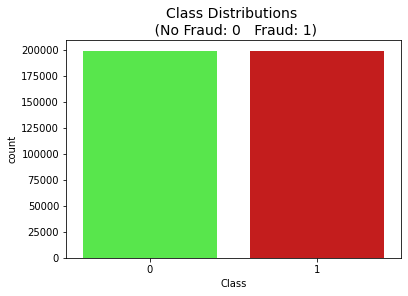

In [ ]:
#plotting already balanced is the target variable 'Class'
colors = ["#42FF33", "#DF0101"]

sns.countplot('Class', data= balanceado_df, palette=colors)
plt.title('Class Distributions \n (No Fraud: 0   Fraud: 1)', fontsize=14)

### Functions


In [ ]:
##----------------------------------------
# Compute metrics

def compute_metrics(model, X_test, y_test, y_pred):
  y_pred_proba = model.predict_proba(X_test)[:, 1] #applying predict_proba on classfication problem is giving a list of 2 outputs for each observation(row, probs for 0 and probs for 1)
  [fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)

  mcm = metrics.confusion_matrix(y_test, y_pred)
  tn = mcm[0, 0]
  tp = mcm[1, 1]
  fn = mcm[1, 0]
  fp = mcm[0, 1]

  Accuracy = metrics.accuracy_score(y_test, y_pred)
  Recall = metrics.recall_score(y_test, y_pred)
  Specificity = tn / (tn + fp)
  Precision = tp/(tp+fp)
  f1_score = 2*((Precision*Recall)/(Precision+Recall))
  AUC= metrics.auc(fpr, tpr)

  print(model.__class__.__name__+" Accuracy is %2.3f" % Accuracy)
  print(model.__class__.__name__+" AUC is %2.3f" % AUC)
  print(model.__class__.__name__+" Sensitivity-Recall is %2.3f" % Recall)
  print(model.__class__.__name__+" Specificity is %2.3f" % Specificity) 
  print(model.__class__.__name__+" f1_score is %2.3f" % f1_score)
  # print classification report
  print(classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()

In [ ]:
#...............................................
#Plot ROC curve
def analisis_roc(model, X, y, POSITIVE_CLASS=1):
    y_proba_predict = model.predict_proba(X)

    positive_class_scores  = y_proba_predict[:,POSITIVE_CLASS]

    fpr, tpr, thresholds = roc_curve(y,
                                     positive_class_scores,
                                     pos_label=POSITIVE_CLASS)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC. Positive class: '+str(POSITIVE_CLASS))
    plt.legend(loc="lower right");

In [ ]:
def precision_recall(model, X, y, POSITIVE_CLASS=1):
    y_proba_predict = model.predict_proba(X) #predict probabilities

    positive_class_scores  = y_proba_predict[:,POSITIVE_CLASS] #keep probabilities only for the positive class
   
   # predict class values
    yhat = model.predict(X)
    # calculate precision and recall for each threshold
    metric_precision, metric_recall, th = precision_recall_curve(y, positive_class_scores)

    # calculate scores
    metric_f1, metric_auc = f1_score(y, yhat), auc(metric_recall, metric_precision)
    # summarize scores
    print(model.__class__.__name__+ ': f1=%.3f auc=%.3f' % (metric_f1, metric_auc))
    # plot the precision-recall curves
    no_skill = len(y[y==1]) / len(y)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(metric_recall, metric_precision, marker='.', label= model.__class__.__name__)
    plt.plot(metric_recall[1:], th, marker='.', label='Threshold')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    
    # show the legend
    plt.legend()
   



###Logistic regression

In [ ]:
log_mod = LogisticRegression(solver = 'liblinear',verbose=1)

log_mod.fit(X_train_bal, y_train_bal)

y_pred = log_mod.predict(X_test)




[LibLinear]

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

log_mod2 = LogisticRegression()
log_mod2 = GridSearchCV(log_mod,grid,cv=10)
log_mod2.fit(X_train_bal, y_train_bal)

print("tuned hpyerparameters :(best parameters) ",log_mod2.best_params_)
print("accuracy :",log_mod2.best_score_)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

GridSearchCV Accuracy is 0.974
GridSearchCV AUC is 0.984
GridSearchCV Sensitivity-Recall is 0.919
GridSearchCV Specificity is 0.974
GridSearchCV f1_score is 0.116
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85283
           1       0.06      0.92      0.12       160

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443



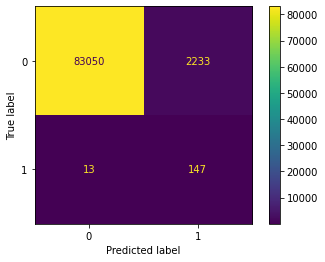

In [ ]:
compute_metrics(log_mod2, X_test, y_test, y_pred)

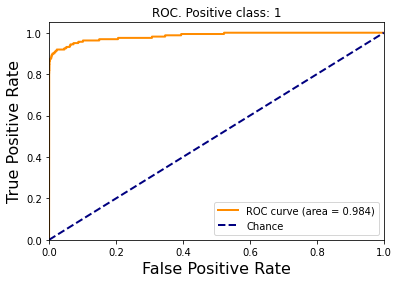

In [ ]:
analisis_roc(log_mod2, X_test, y_test, POSITIVE_CLASS=1)

GridSearchCV: f1=0.116 auc=0.766


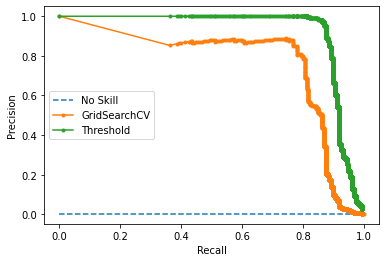

In [ ]:
precision_recall(log_mod2, X_test, y_test, POSITIVE_CLASS=1)

### K-nearest neighbors


In [ ]:
n = 5

knn_mod = KNeighborsClassifier(n_neighbors = n)
knn_mod.fit(X_train_bal, y_train_bal)

y_pred = knn_mod.predict(X_test)

KNeighborsClassifier Accuracy is 0.998
KNeighborsClassifier AUC is 0.946
KNeighborsClassifier Sensitivity-Recall is 0.894
KNeighborsClassifier Specificity is 0.998
KNeighborsClassifier f1_score is 0.615
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.47      0.89      0.62       160

    accuracy                           1.00     85443
   macro avg       0.73      0.95      0.81     85443
weighted avg       1.00      1.00      1.00     85443



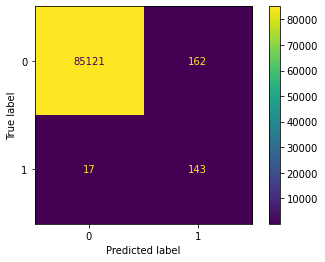

In [ ]:
compute_metrics(knn_mod, X_test, y_test, y_pred)

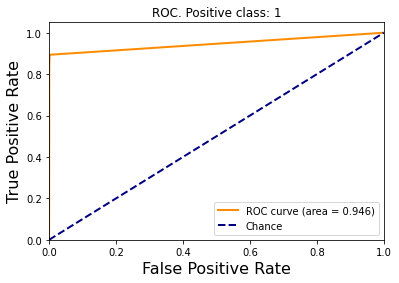

In [ ]:
analisis_roc(knn_mod, X_test, y_test, POSITIVE_CLASS=1)

KNeighborsClassifier: f1=0.615 auc=0.779


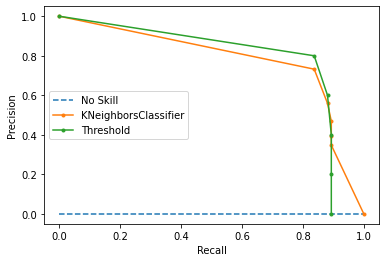

In [ ]:
precision_recall(knn_mod, X_test, y_test, POSITIVE_CLASS=1)

### Naive Bayes

In [ ]:
nb_mod = GaussianNB()

nb_mod.fit(X_train_bal, y_train_bal)

y_pred = nb_mod.predict(X_test)

GaussianNB Accuracy is 0.975
GaussianNB AUC is 0.958
GaussianNB Sensitivity-Recall is 0.856
GaussianNB Specificity is 0.976
GaussianNB f1_score is 0.115
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85283
           1       0.06      0.86      0.12       160

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443



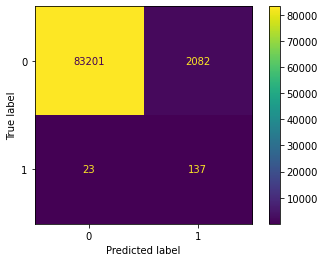

In [ ]:
compute_metrics(nb_mod, X_test, y_test, y_pred)

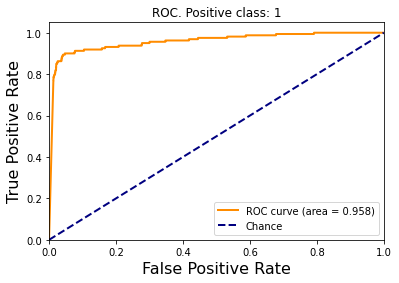

In [ ]:
analisis_roc(nb_mod, X_test, y_test, POSITIVE_CLASS=1)

GaussianNB: f1=0.115 auc=0.422


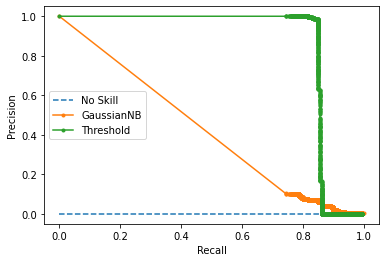

In [ ]:
precision_recall(nb_mod, X_test, y_test, POSITIVE_CLASS=1)

### Decision Tree

In [ ]:
#jugar con estos parámetros: class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
#min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)[source]

dtree_mod = DecisionTreeClassifier(random_state = seed, max_depth=4)

dtree_mod.fit(X_train_bal, y_train_bal)

y_pred = dtree_mod.predict(X_test)

In [ ]:
grid={ "max_depth": range(0,10), "min_weight_fraction_leaf" : range(0, 1)}

dtree_mod2 = DecisionTreeClassifier(random_state= seed)
dtree_mod2 = GridSearchCV(dtree_mod,grid,cv=10)
dtree_mod2.fit(X_train_bal, y_train_bal)

print("tuned hpyerparameters :(best parameters) ",dtree_mod2.best_params_)
print("accuracy :",dtree_mod2.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than

tuned hpyerparameters :(best parameters)  {'max_depth': 9, 'min_weight_fraction_leaf': 0}
accuracy : 0.9843065482885789


GridSearchCV Accuracy is 0.997
GridSearchCV AUC is 0.930
GridSearchCV Sensitivity-Recall is 0.781
GridSearchCV Specificity is 0.998
GridSearchCV f1_score is 0.520
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.39      0.78      0.52       160

    accuracy                           1.00     85443
   macro avg       0.69      0.89      0.76     85443
weighted avg       1.00      1.00      1.00     85443



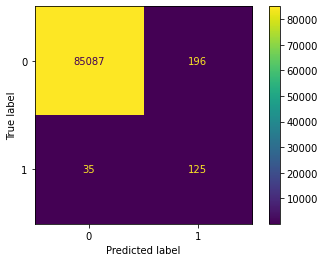

In [ ]:
compute_metrics(dtree_mod2, X_test, y_test, y_pred)

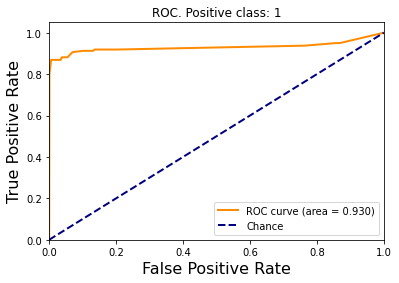

In [ ]:
analisis_roc(dtree_mod2, X_test, y_test, POSITIVE_CLASS=1)

GridSearchCV: f1=0.170 auc=0.280


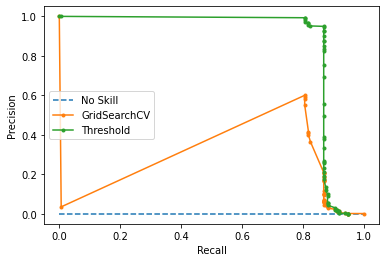

In [ ]:
precision_recall(dtree_mod2, X_test, y_test, POSITIVE_CLASS=1)

### Decision Tree cambiando max_depth = 4

DecisionTreeClassifier Accuracy is 0.967
DecisionTreeClassifier AUC is 0.969
DecisionTreeClassifier Sensitivity-Recall is 0.900
DecisionTreeClassifier Specificity is 0.967
DecisionTreeClassifier f1_score is 0.094
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85283
           1       0.05      0.90      0.09       160

    accuracy                           0.97     85443
   macro avg       0.52      0.93      0.54     85443
weighted avg       1.00      0.97      0.98     85443



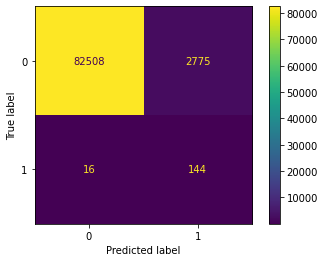

In [ ]:
compute_metrics(dtree_mod, X_test, y_test, y_pred)

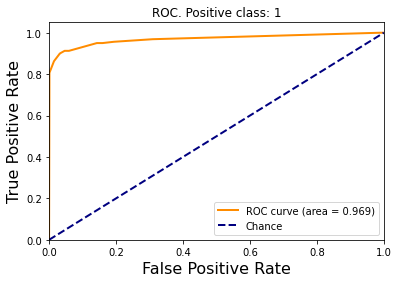

In [ ]:
analisis_roc(dtree_mod, X_test, y_test, POSITIVE_CLASS=1)

DecisionTreeClassifier: f1=0.094 auc=0.359


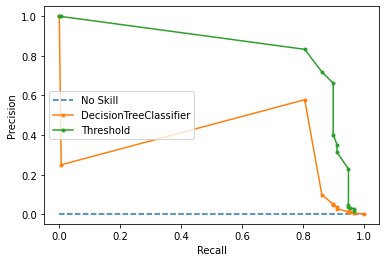

In [ ]:
precision_recall(dtree_mod, X_test, y_test, POSITIVE_CLASS=1)

### Random Forest

In [ ]:
#mirar parámetros para optimizar random forest
rf_mod = RandomForestClassifier(random_state = seed, n_estimators= 100, criterion= 'entropy', max_depth= 8, min_samples_split= 2, max_features= 'sqrt')

rf_mod.fit(X_train_bal, y_train_bal)

y_pred = rf_mod.predict(X_test)

RandomForestClassifier Accuracy is 0.998
RandomForestClassifier AUC is 0.987
RandomForestClassifier Sensitivity-Recall is 0.869
RandomForestClassifier Specificity is 0.998
RandomForestClassifier f1_score is 0.571
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.43      0.87      0.57       160

    accuracy                           1.00     85443
   macro avg       0.71      0.93      0.78     85443
weighted avg       1.00      1.00      1.00     85443



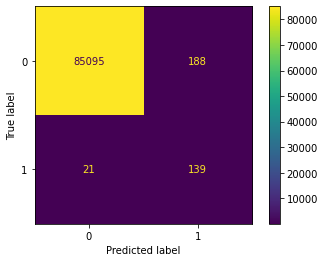

In [ ]:
compute_metrics(rf_mod, X_test, y_test, y_pred)

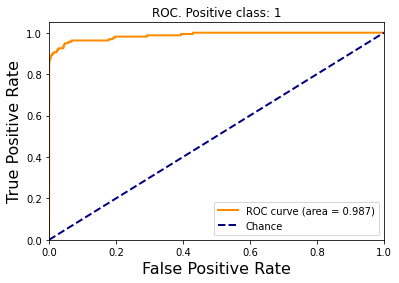

In [ ]:
analisis_roc(rf_mod, X_test, y_test, POSITIVE_CLASS=1)

RandomForestClassifier: f1=0.571 auc=0.847


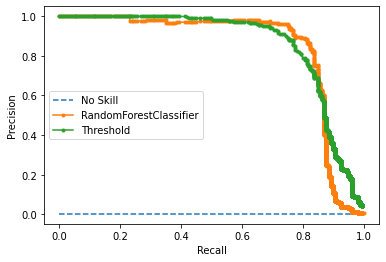

In [ ]:
precision_recall(rf_mod, X_test, y_test, POSITIVE_CLASS=1)

### Adaboost 

In [ ]:
adab_mod = AdaBoostClassifier(random_state = seed, base_estimator= None, n_estimators = 50, learning_rate= 1, algorithm= 'SAMME.R')

adab_mod.fit(X_train_bal, y_train_bal)

y_pred = adab_mod.predict(X_test)

AdaBoostClassifier Accuracy is 0.981
AdaBoostClassifier AUC is 0.979
AdaBoostClassifier Sensitivity-Recall is 0.900
AdaBoostClassifier Specificity is 0.981
AdaBoostClassifier f1_score is 0.148
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85283
           1       0.08      0.90      0.15       160

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.57     85443
weighted avg       1.00      0.98      0.99     85443



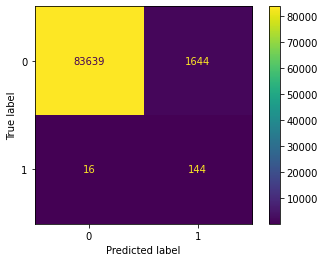

In [ ]:
compute_metrics(adab_mod, X_test, y_test, y_pred)

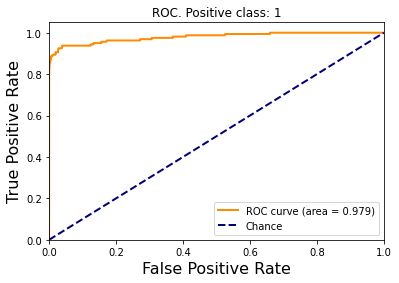

In [ ]:
analisis_roc(adab_mod, X_test, y_test, POSITIVE_CLASS=1)

AdaBoostClassifier: f1=0.148 auc=0.810


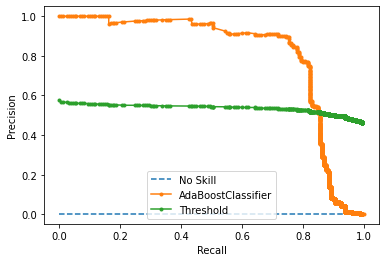

In [ ]:
precision_recall(adab_mod, X_test, y_test, POSITIVE_CLASS=1)